In [1]:
import numpy as np 
import pandas as pd
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [16]:
# data = pd.read_csv('./data/Arrestos.csv')
data = pd.read_csv('./data/Arrestos2.csv', delimiter=';', header=0)
data.shape
data.head()
data.describe()

,Unnamed: 0,year,age,checks
count,5226.000000,5226.000000,5226.000000,5226.000000
mean,2613.500000,1999.509376,23.846537,1.636433
std,1508.760584,1.390056,8.316133,1.539230
min,1.000000,1997.000000,12.000000,0.000000
25%,1307.250000,1998.000000,18.000000,0.000000
50%,2613.500000,2000.000000,21.000000,1.000000
75%,3919.750000,2001.000000,27.000000,3.000000
max,5226.000000,2002.000000,66.000000,6.000000


In [53]:
# data['released']
filtered_data = data[(data['age']> 18) & (data['released'])]
 # check the values
f1 = filtered_data['checks'].values
f2 = filtered_data['released'].values
print(f2)

['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']


In [59]:
dataX = filtered_data[["age"]]
X_train = np.array(dataX)
bool_arr = np.where(filtered_data['released'] == 'Yes', True, False)
y_train = bool_arr
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.0018168]
Independent term: 
 0.8150264677914124
Mean squared error: 0.18
Variance score: 0.00


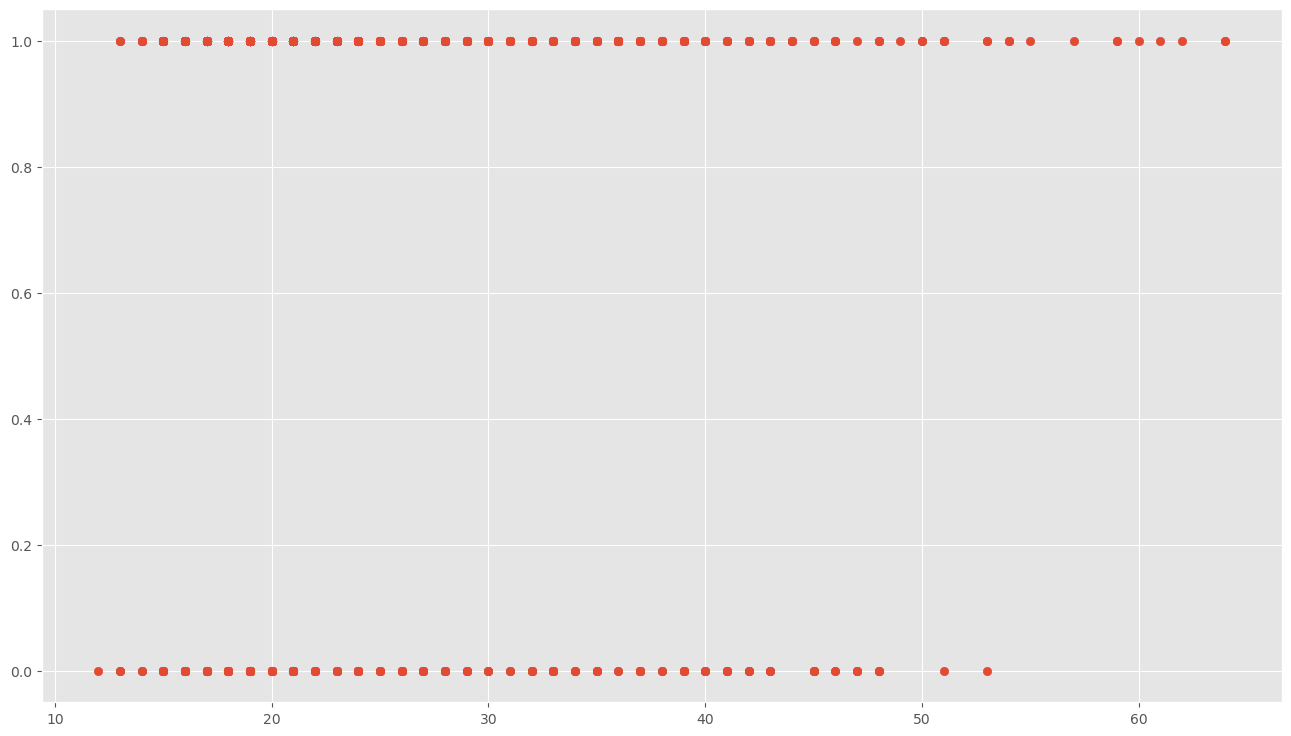

In [60]:
plt.scatter(X_train, y_train) 
plt.show()

In [66]:
example = regr.predict([[32]])
print(int(example))

0


Linealmente no funciona

## Ejercicio 1

In [99]:
# Encararlo de manera no lineal
X = data[['age','checks']]
print(type(X))
y = np.where(data['released'] == 'Yes', True, False)
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X,y)


<class 'pandas.core.frame.DataFrame'>


LinearRegression()

In [90]:
prediction = regr.predict([[26, 6]]) 
if prediction[0] > 0.5:
    print("Es liberado")
else:
    print("NO es liberado")

Es liberado


/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Ejercicio 2

In [187]:
filtered_data = data
male_filtered_data = np.where(filtered_data['sex'] == 'Male', True, False)
employed_filtered_data = np.where(filtered_data['employed']=='Yes',True,False)
y = np.where(filtered_data['released'] == 'Yes', True, False)
X = pd.DataFrame({'sex': male_filtered_data, 'employed': employed_filtered_data}, columns=['sex', 'employed'])
regr = linear_model.LinearRegression()
regr.fit(X,y)


LinearRegression()

In [188]:
prediction = regr.predict([[0, 0]]) 
print(prediction)
if prediction[0] > 0.5:
    print("Es liberado")
else:
    print("NO es liberado")

[0.72424066]
Es liberado


/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Ejercicio 3

In [189]:
check_filtered_data = np.where(filtered_data['checks'] == 'Yes', True, False)
citizen_filtered_data = np.where(filtered_data['citizen']=='Yes',True,False)
X = pd.DataFrame({'checks': check_filtered_data, 'citizen': citizen_filtered_data}, columns=['checks', 'citizen'])
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [194]:
prediction = regr.predict([[2, 1]]) 
print(prediction)
if prediction[0] > 0.5:
    print("Es liberado")
else:
    print("NO es liberado")

[0.84736251]
Es liberado


/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [195]:
y = data[['age']]
X = pd.DataFrame({'employed': employed_filtered_data, 'citizen': citizen_filtered_data}, columns=['employed', 'citizen'])
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [198]:
prediction = regr.predict([[1, 1]]) 
print(f"La edad del individuo estimada es: {round(prediction[0][0])}")

La edad del individuo estimada es: 23


/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
